In [1]:
!pip install tensorflow

     -------------------------------------- 444.0/444.0 MB 2.2 MB/s eta 0:00:00
     --------------------------------------- 14.2/14.2 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 10.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 123.4/123.4 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 9.4 MB/s eta 0:00:00
     ------------------------------------- 438.7/438.7 kB 13.8 MB/s eta 0:00:00
     -----------------

In [70]:
import os
import tensorflow as tf
import numpy as np

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import  load_img
from tensorflow.keras.preprocessing.image import  img_to_array
from tensorflow.keras.applications.vgg16 import VGG16

from matplotlib import pyplot as plt
from matplotlib.image import imread

from pprint import pprint

In [50]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O D:/ia/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


# Inception

In [71]:
local_weights_file = 'D:/ia/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [72]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_121 (Conv2D)            (None, 74, 74, 32)   864         ['input_10[0][0]']               
                                                                                                  
 batch_normalization_106 (Batch  (None, 74, 74, 32)  96          ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                       

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_116 (Batch  (None, 16, 16, 96)  288         ['conv2d_131[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 16, 16, 32)  96          ['conv2d_132[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_111[0][0]']
                                                                                                  
 activatio

 activation_116 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_128[0][0]']
                                                                                                  
 conv2d_141 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_144 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_126 (Batch  (None, 16, 16, 48)  144         ['conv2d_141[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_129 (Batch  (None, 16, 16, 96)  288         ['conv2d_144[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_20[0][0]']       
                                                                                                  
 conv2d_155 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_140 (Batch  (None, 7, 7, 128)   384         ['conv2d_155[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_140[0][0]']
          

                                                                                                  
 batch_normalization_150 (Batch  (None, 7, 7, 160)   480         ['conv2d_165[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_150[0][0]']
                                                                                                  
 conv2d_166 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_151 (Batch  (None, 7, 7, 160)   480         ['conv2d_166[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_176 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_161 (Batch  (None, 7, 7, 160)   480         ['conv2d_176[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_172 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_17

                                                                                                  
 activation_159 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_171[0][0]']
                                                                                                  
 conv2d_182 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_187 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 7, 7, 192)   576         ['conv2d_182[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 conv2d_195 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_176 (Batch  (None, 7, 7, 192)   576         ['conv2d_191[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_180 (Batch  (None, 7, 7, 192)   576         ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_164 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_172 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_184[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_188[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_189[0][0]']
                                                                                                  
 batch_normalization_190 (Batch  (None, 3, 3, 192)   576         ['conv2d_205[0][0]']             
 Normaliza

                                                                                                  
 activation_186 (Activation)    (None, 3, 3, 384)    0           ['batch_normalization_198[0][0]']
                                                                                                  
 batch_normalization_199 (Batch  (None, 3, 3, 192)   576         ['conv2d_214[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 3, 3, 320)    0           ['batch_normalization_191[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_181[0][0]',         
                                                                  'activation_182[0][0]']         
          

In [73]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [74]:
last_layer = pre_trained_model.get_layer('mixed7')
last_layer.output
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output
last_output

last layer output shape: (None, 7, 7, 768)


<KerasTensor: shape=(None, 7, 7, 768) dtype=float32 (created by layer 'mixed7')>

In [75]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='selu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.3)(x)
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
inputs = pre_trained_model.input
model = Model(inputs, outputs)
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])#0.0001

In [76]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_121 (Conv2D)            (None, 74, 74, 32)   864         ['input_10[0][0]']               
                                                                                                  
 batch_normalization_106 (Batch  (None, 74, 74, 32)  96          ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                            

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_116 (Batch  (None, 16, 16, 96)  288         ['conv2d_131[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 16, 16, 32)  96          ['conv2d_132[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_111[0][0]']
                                                                                                  
 activatio

 activation_116 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_128[0][0]']
                                                                                                  
 conv2d_141 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_144 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_126 (Batch  (None, 16, 16, 48)  144         ['conv2d_141[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_129 (Batch  (None, 16, 16, 96)  288         ['conv2d_144[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_20[0][0]']       
                                                                                                  
 conv2d_155 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_140 (Batch  (None, 7, 7, 128)   384         ['conv2d_155[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_140[0][0]']
          

                                                                                                  
 batch_normalization_150 (Batch  (None, 7, 7, 160)   480         ['conv2d_165[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_150[0][0]']
                                                                                                  
 conv2d_166 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_151 (Batch  (None, 7, 7, 160)   480         ['conv2d_166[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_176 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_161 (Batch  (None, 7, 7, 160)   480         ['conv2d_176[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_172 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_17

                                                                                                  
 activation_159 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_171[0][0]']
                                                                                                  
 conv2d_182 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_187 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 7, 7, 192)   576         ['conv2d_182[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

In [77]:
# Define our example directories and files
base_dir = 'D:/ia/cars_vs_flowers'
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')

# Directory with our training flower pictures
train_flower_dir = os.path.join(train_dir, 'flower')

# Directory with our training car pictures
train_car_dir = os.path.join(train_dir, 'car')

# Directory with our validation flower pictures
validation_flower_dir = os.path.join(validation_dir, 'flower')

# Directory with our validation car pictures
validation_car_dir = os.path.join(validation_dir, 'car')

train_flower_fnames = os.listdir(train_flower_dir)
train_car_fnames = os.listdir(train_car_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [78]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=30,
      verbose=2)

Epoch 1/5


C:\Users\nicol\AppData\Local\Temp/ipykernel_16956/1995054854.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 - 77s - loss: 1.4918 - acc: 0.8425 - val_loss: 0.2346 - val_acc: 0.9350 - 77s/epoch - 774ms/step
Epoch 2/5
100/100 - 71s - loss: 0.4545 - acc: 0.8890 - val_loss: 0.3909 - val_acc: 0.9100 - 71s/epoch - 715ms/step
Epoch 3/5
100/100 - 73s - loss: 0.4511 - acc: 0.8850 - val_loss: 0.5014 - val_acc: 0.8867 - 73s/epoch - 728ms/step
Epoch 4/5
100/100 - 73s - loss: 0.3636 - acc: 0.8905 - val_loss: 0.3093 - val_acc: 0.9267 - 73s/epoch - 731ms/step
Epoch 5/5
100/100 - 73s - loss: 0.3899 - acc: 0.8855 - val_loss: 0.3233 - val_acc: 0.9067 - 73s/epoch - 729ms/step


In [79]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.3)(x)
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
inputs = pre_trained_model.input
model_relu = Model(inputs, outputs)
model_relu.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])#0.0001

In [80]:
model_relu.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_121 (Conv2D)            (None, 74, 74, 32)   864         ['input_10[0][0]']               
                                                                                                  
 batch_normalization_106 (Batch  (None, 74, 74, 32)  96          ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                            

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_116 (Batch  (None, 16, 16, 96)  288         ['conv2d_131[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_117 (Batch  (None, 16, 16, 32)  96          ['conv2d_132[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_99 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_111[0][0]']
                                                                                                  
 activatio

 activation_116 (Activation)    (None, 16, 16, 64)   0           ['batch_normalization_128[0][0]']
                                                                                                  
 conv2d_141 (Conv2D)            (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_144 (Conv2D)            (None, 16, 16, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_normalization_126 (Batch  (None, 16, 16, 48)  144         ['conv2d_141[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_129 (Batch  (None, 16, 16, 96)  288         ['conv2d_144[0][0]']             
 Normaliza

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_20[0][0]']       
                                                                                                  
 conv2d_155 (Conv2D)            (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_140 (Batch  (None, 7, 7, 128)   384         ['conv2d_155[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_128 (Activation)    (None, 7, 7, 128)    0           ['batch_normalization_140[0][0]']
          

                                                                                                  
 batch_normalization_150 (Batch  (None, 7, 7, 160)   480         ['conv2d_165[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_150[0][0]']
                                                                                                  
 conv2d_166 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_138[0][0]']         
                                                                                                  
 batch_normalization_151 (Batch  (None, 7, 7, 160)   480         ['conv2d_166[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_176 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_161 (Batch  (None, 7, 7, 160)   480         ['conv2d_176[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 7, 7, 160)    0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_172 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_17

                                                                                                  
 activation_159 (Activation)    (None, 7, 7, 192)    0           ['batch_normalization_171[0][0]']
                                                                                                  
 conv2d_182 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_187 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_159[0][0]']         
                                                                                                  
 batch_normalization_167 (Batch  (None, 7, 7, 192)   576         ['conv2d_182[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

In [81]:
history_relu = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=30,
      verbose=2)

Epoch 1/5


C:\Users\nicol\AppData\Local\Temp/ipykernel_16956/3186922652.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_relu = model.fit_generator(


100/100 - 72s - loss: 0.3559 - acc: 0.8920 - val_loss: 0.4561 - val_acc: 0.9017 - 72s/epoch - 724ms/step
Epoch 2/5
100/100 - 73s - loss: 0.3346 - acc: 0.9080 - val_loss: 0.4877 - val_acc: 0.9200 - 73s/epoch - 728ms/step
Epoch 3/5
100/100 - 72s - loss: 0.3367 - acc: 0.9010 - val_loss: 0.2919 - val_acc: 0.9167 - 72s/epoch - 718ms/step
Epoch 4/5
100/100 - 72s - loss: 0.3189 - acc: 0.9040 - val_loss: 0.2878 - val_acc: 0.9350 - 72s/epoch - 721ms/step
Epoch 5/5
100/100 - 72s - loss: 0.3399 - acc: 0.9070 - val_loss: 0.2465 - val_acc: 0.9283 - 72s/epoch - 716ms/step


In [82]:
def diagnostic_learning_curves(history):
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
    acc = history.history['acc']
    val_acc = history.history['val_acc']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

  # Get number of epochs
    epochs = range(len(acc))

  # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')

    plt.figure()

  # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')

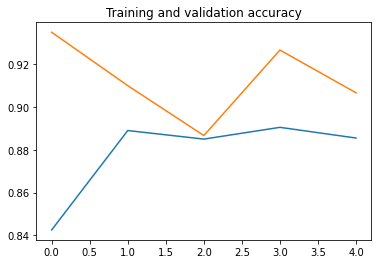

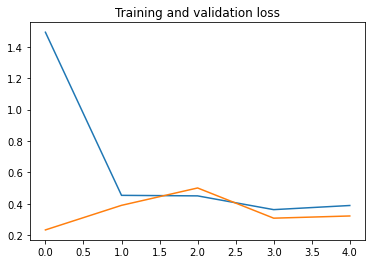

In [83]:
diagnostic_learning_curves(history)

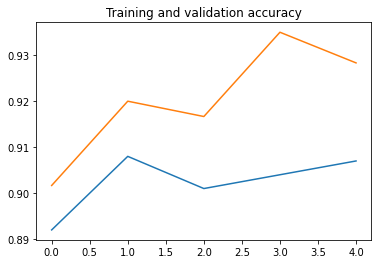

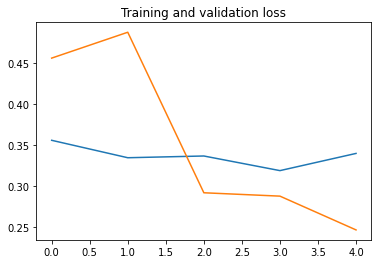

In [84]:
diagnostic_learning_curves(history_relu)

# VGG16

In [85]:
model_2 = VGG16()
model_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [86]:
cnn = Sequential()

for layer in model_2.layers[:-8]:
    cnn.add(layer)
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [87]:
for layer in cnn.layers:
    layer.trainable = False
    
for layer in cnn.layers:
    print(layer.trainable) 

False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [88]:
cnn.add(tf.keras.layers.Conv2D(512, 3, activation='selu'))
cnn.add(tf.keras.layers.Conv2D(512, 3, activation='selu'))
cnn.add(tf.keras.layers.Conv2D(512, 3, activation='selu'))
cnn.add(tf.keras.layers.MaxPooling2D(2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(Dense(units=4096, activation='selu'))
cnn.add(Dense(units=4096, activation='selu'))
cnn.add(Dense(units=1, activation='softmax'))

In [89]:
cnn.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [90]:
train_generator_2 = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator_2 = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

history_2 = cnn.fit_generator(
      train_generator_2,
      steps_per_epoch=50,
      epochs=2,
      validation_data=validation_generator_2,
      validation_steps=30,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


C:\Users\nicol\AppData\Local\Temp/ipykernel_16956/1947313747.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = cnn.fit_generator(


Epoch 1/2
50/50 - 255s - loss: 2682.3188 - acc: 0.5110 - val_loss: 54.6385 - val_acc: 0.5250 - 255s/epoch - 5s/step
Epoch 2/2
50/50 - 259s - loss: 7.7760 - acc: 0.5100 - val_loss: 0.8745 - val_acc: 0.4917 - 259s/epoch - 5s/step


In [92]:
cnn_relu = Sequential()

for layer in model_2.layers[:-8]:
    cnn_relu.add(layer)
    
for layer in cnn_relu.layers:
    layer.trainable = False

cnn_relu.add(tf.keras.layers.Conv2D(512, 3, activation='relu'))
cnn_relu.add(tf.keras.layers.Conv2D(512, 3, activation='relu'))
cnn_relu.add(tf.keras.layers.Conv2D(512, 3, activation='relu'))
cnn_relu.add(tf.keras.layers.MaxPooling2D(2))
cnn_relu.add(tf.keras.layers.Flatten())
cnn_relu.add(Dense(units=4096, activation='relu'))
cnn_relu.add(Dense(units=4096, activation='relu'))
cnn_relu.add(Dense(units=1, activation='softmax'))

cnn_relu.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

history_relu_2 = cnn_relu.fit_generator(
      train_generator_2,
      steps_per_epoch=50,
      epochs=2,
      validation_data=validation_generator_2,
      validation_steps=30,
      verbose=2)

C:\Users\nicol\AppData\Local\Temp/ipykernel_16956/3606103740.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_relu_2 = cnn_relu.fit_generator(


Epoch 1/2
50/50 - 255s - loss: 218.4527 - acc: 0.4990 - val_loss: 0.4352 - val_acc: 0.4883 - 255s/epoch - 5s/step
Epoch 2/2
50/50 - 258s - loss: 0.9903 - acc: 0.5100 - val_loss: 0.4200 - val_acc: 0.4917 - 258s/epoch - 5s/step


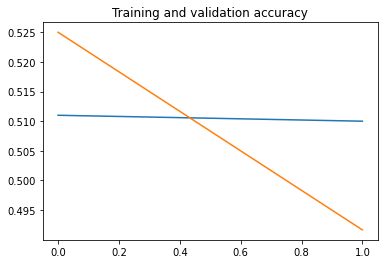

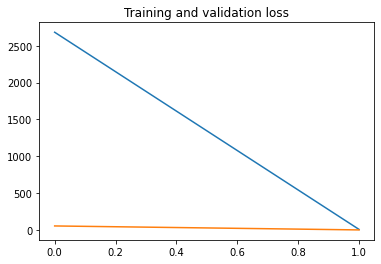

In [93]:
diagnostic_learning_curves(history_2)

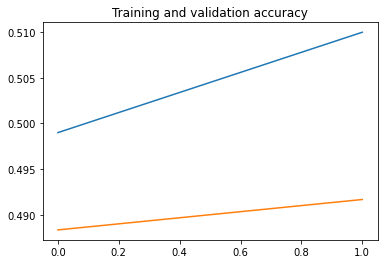

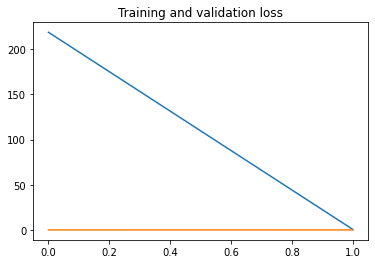

In [94]:
diagnostic_learning_curves(history_relu_2)

# From scratch

In [95]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='selu')(img_input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='selu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='selu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='selu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model_3 = Model(img_input, output)

In [96]:
model_3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_224 (Conv2D)         (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_200 (Ba  (None, 148, 148, 16)     64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_225 (Conv2D)         (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_201 (Ba  (None, 72, 72, 32)       128 

In [97]:
model_3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [98]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [99]:
history_3 = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 79s - loss: 0.2143 - acc: 0.9450 - val_loss: 0.2497 - val_acc: 0.9250 - 79s/epoch - 795ms/step
Epoch 2/10
100/100 - 78s - loss: 0.1114 - acc: 0.9655 - val_loss: 0.5309 - val_acc: 0.9250 - 78s/epoch - 779ms/step
Epoch 3/10
100/100 - 78s - loss: 0.0652 - acc: 0.9880 - val_loss: 0.4809 - val_acc: 0.9320 - 78s/epoch - 777ms/step
Epoch 4/10
100/100 - 82s - loss: 0.0753 - acc: 0.9865 - val_loss: 0.6312 - val_acc: 0.9290 - 82s/epoch - 820ms/step
Epoch 5/10
100/100 - 79s - loss: 0.0653 - acc: 0.9915 - val_loss: 0.4825 - val_acc: 0.9400 - 79s/epoch - 789ms/step
Epoch 6/10
100/100 - 79s - loss: 0.0600 - acc: 0.9925 - val_loss: 0.6721 - val_acc: 0.9380 - 79s/epoch - 785ms/step
Epoch 7/10
100/100 - 76s - loss: 0.0794 - acc: 0.9905 - val_loss: 1.1947 - val_acc: 0.9080 - 76s/epoch - 762ms/step
Epoch 8/10
100/100 - 77s - loss: 0.0655 - acc: 0.9930 - val_loss: 0.7188 - val_acc: 0.9350 - 77s/epoch - 771ms/step
Epoch 9/10
100/100 - 75s - loss: 0.0632 - acc: 0.9945 - val_loss: 1.1800

In [100]:
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model_relu_3 = Model(img_input, output)

model_relu_3.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

history_relu_3 = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
100/100 - 76s - loss: 0.0754 - acc: 0.9935 - val_loss: 0.8428 - val_acc: 0.9370 - 76s/epoch - 761ms/step
Epoch 2/10
100/100 - 76s - loss: 0.0771 - acc: 0.9935 - val_loss: 0.9201 - val_acc: 0.9270 - 76s/epoch - 757ms/step
Epoch 3/10
100/100 - 75s - loss: 0.0632 - acc: 0.9925 - val_loss: 0.6651 - val_acc: 0.9390 - 75s/epoch - 749ms/step
Epoch 4/10
100/100 - 78s - loss: 0.0511 - acc: 0.9960 - val_loss: 1.2544 - val_acc: 0.9070 - 78s/epoch - 776ms/step
Epoch 5/10
100/100 - 77s - loss: 0.0530 - acc: 0.9955 - val_loss: 0.8691 - val_acc: 0.9350 - 77s/epoch - 767ms/step
Epoch 6/10
100/100 - 77s - loss: 0.0623 - acc: 0.9955 - val_loss: 0.8616 - val_acc: 0.9130 - 77s/epoch - 766ms/step
Epoch 7/10
100/100 - 77s - loss: 0.0588 - acc: 0.9950 - val_loss: 0.8421 - val_acc: 0.9310 - 77s/epoch - 768ms/step
Epoch 8/10
100/100 - 78s - loss: 0.0568 - acc: 0.9950 - val_loss: 1.5034 - val_acc: 0.9030 - 78s/epoch - 783ms/step
Epoch 9/10
100/100 - 77s - loss: 0.0678 - acc: 0.9940 - val_loss: 0.8998

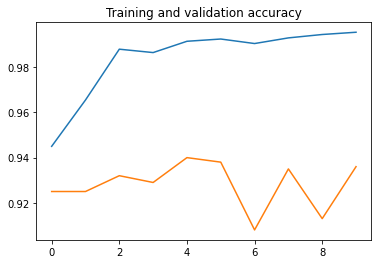

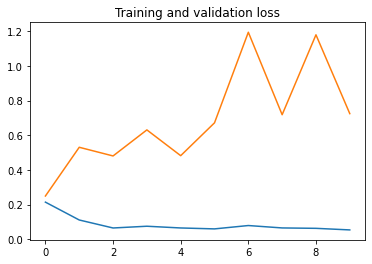

In [101]:
diagnostic_learning_curves(history_3)

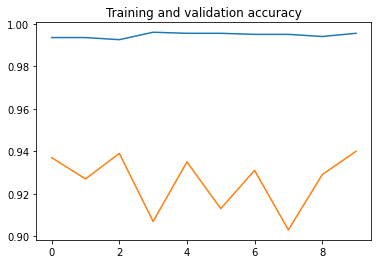

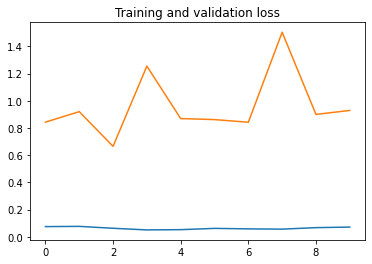

In [102]:
diagnostic_learning_curves(history_relu_3)